In [1]:
data_root = '../data/'

In [2]:
import pandas as pd


In [3]:
import seaborn as sns

In [4]:
raw_df = pd.read_excel(data_root+'raw_data.xlsx')
df = pd.read_excel(data_root+'extracted.xlsx')

In [5]:
raw_df.head()

,Unnamed: 0,email,ts,round,x,y,ix,iy
0,0,01094474828@naver.com,1548990076421,1,-1.0,-1.0,-1,-1
1,1,01094474828@naver.com,1548990084275,1,30.2,39.7,74,67
2,2,01094474828@naver.com,1548990084455,1,29.8,40.0,74,67
3,3,01094474828@naver.com,1548990095856,1,34.9,35.4,74,67
4,4,01094474828@naver.com,1548990096043,1,29.8,40.0,74,67


In [6]:
df.head()

,Unnamed: 0,alpha,avg_ccei,email,med_ccei,min_ccei,omega,rho
0,0,0.809374,0.998411,01094474828@naver.com,0.980753,0.914301,0.128506,-0.358958
1,1,0.898992,0.980414,062woogwang@gmail.com,0.916396,0.574449,0.937243,2.819629
2,2,1.549390,0.996846,0718lhj@daum.net,0.960723,0.863205,0.006313,0.297705
3,3,1.000000,0.999955,12356778@naver.com,0.998352,0.994222,0.026652,-0.040149
4,4,1.000000,0.999272,1zzik@naver.com,0.995806,0.888774,0.122071,-0.172309


In [7]:
def scatter(df, you):
    selected = [0] * len(df)
    selected[you] = 1
    df['selected'] = selected
    new_df = pd.concat([df[df['selected'] == 0], df[df['selected'] == 1]])
    sns.scatterplot(data=new_df, x='alpha', y='rho', hue='selected')

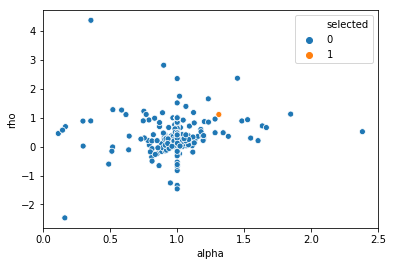

In [8]:
scatter(df, 40)

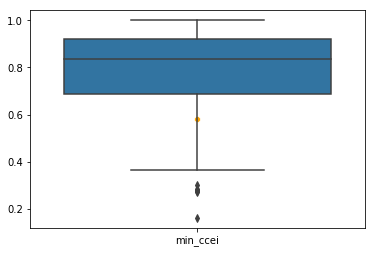

In [32]:
tmpdf = df[['min_ccei']]
sns.boxplot(data=tmpdf)

sns.scatterplot(data=tmpdf.iloc[5], color='orange')